# Taller 4

1.[Ejemplos y resultados -Kutz-](#primero)
   - [Series y transformadas de Fourier](#12.1)
   - [Aplicaciones del FFT: Detección y filtrado](#12.2)
   - [Aplicaciones del FFT: Detección y promedio](#12.3)


2.[Ejemplo propio](#segundo)<br/>
3.[Referencias](#tercero)

(Para este taller no habrán anexos ya que el código empleado es relevante para cada ejemplo)

In [1]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import string
import matplotlib.cm as cm
import wave
import sys
import winsound
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


## 1. Ejemplos y resultados -Kutz- <a name="primero"></a>


La idea general de utilizar una transformada de Fourier es **representar funciones y sus derivadas** como sumas de senos y cosenos. Esto se puede hacer a través de una una FFT (Fast-Fourirer transform).  

#### Series y transfomadas de Fourier <a name="12.1"></a>

La transformada de Fourier es una integral definida desde -$\infty$ hasta $\infty$.<br /> 
$F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-ikx}f(x)\mathrm{d}x$ <br />
Su inversa se define como: <br />
$f(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{ikx}F(k)\mathrm{d}k$ <br />
En relación con la derivada de una función, se llega a que la transformada de Fourier de una derivada, representada como $\widehat{f'(x)}$ es la siguiente: 
$\widehat{f'(x)} = ik\widehat{f(x)}$ y en general 
$\widehat{f^{n}(x)} = (ik)^n\widehat{f(x)}$


**Ejemplos**

**1.1** <br />
Si tenemos una ecuación diferencial de segundo orden como la siguiente:
$y'' - \omega^2y = -f(x) \hspace{5mm} x \in [-\infty,\infty]$ <br />
Sacando la transformada de cada función:
$\widehat{y''}-\omega^2\widehat{y} = -\widehat{f}$ <br />
Que equivale a:
- $i^2k^2\widehat{y}-\omega^2\widehat{y} = -\widehat{f}$ <br />
- $-k^2\widehat{y}-\omega^2\widehat{y} = -\widehat{f}$ <br />

Despejando para $\widehat{y}$: <br />
$\widehat{y} =  \frac{\widehat{f}}{k^2+\omega^2}$ <br />
La **solución** de esta ecuación diferencial de segundo orden, utilizando la ecuación de la inversa de la transformada, sería:
$y(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty e^{ikx} \frac{\widehat{f}}{k^2+\omega^2} \mathrm{d}k$<br />
Y el resultado de esta integral se puede evaluar numéricamente.



A continuación se muestra cómo cambia el dominio de una función al momento de realizar la transformada en un programa como Python o Matlab.

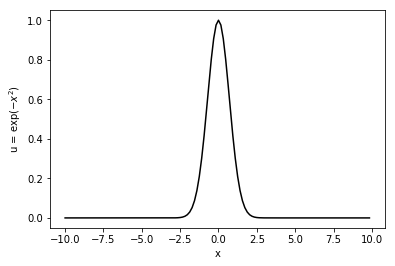

In [2]:
L = 20    #Dominio de la función
n = 128   #Cuantas series de Fourier se crean (Fourier mode = 2^n)
#Valores asignados al dominio:
x2 = linspace(-L/2,L/2,n+1) 
x = x2[0:n]

u = exp(-x*x) #Función evaluada

#Dominio de la transformada:
vecto = concatenate((arange(0,n/2),arange(-n/2,0)))
fou= (2*pi/(2*L))*(vecto)
fm = fft.fftshift(vecto)

#Gráfica de la función:
plt.plot(x,u,'k')
plt.xlabel('x')
plt.ylabel('u = exp($-x^2$)')
plt.show()

#####  Figura 1. Gráfica de la función evaluada u = exp(-x$^2$)

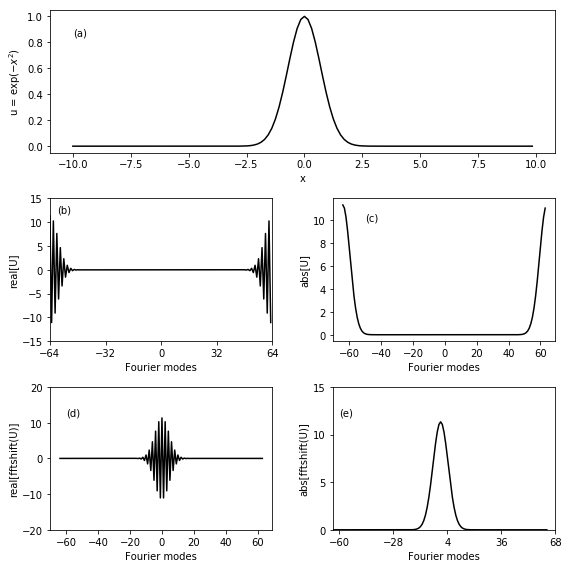

In [3]:
ut = fft.fft(u) #Tranformada de Fourier de la función
utshift = fft.fftshift(ut) #Tranformada organizada en el orden correcto

plt.figure(1,figsize=(8,8))
plt.subplot(311) #Gráfica de la función original
plt.plot(x,u,'k')
plt.xlabel('x')
plt.ylabel('u = exp($-x^2$)')
plt.annotate('(a)',xy=(-10,0.85))

plt.subplot(323) #Gráfica de los valores reales de la transformada 
plt.plot(fm,real(ut),'k')
plt.xlabel('Fourier modes')
plt.ylabel('real[U]')
plt.xlim(-64,64)
plt.xticks(arange(-64,96,32))
plt.ylim(-15,15)
plt.yticks(arange(-15,20,5))
plt.annotate('(b)',xy=(-60,12))

plt.subplot(324)
plt.plot(fm,abs(ut),'k') # Gráfica de los valores absolutos de la transformada 
plt.xlabel('Fourier modes')
plt.ylabel('abs[U]')
plt.annotate('(c)',xy=(-50,10))

plt.subplot(325) # Gráfica de los valores reales de la transformada ordenada
plt.plot(fm,real(utshift),'k')
plt.xlabel('Fourier modes')
plt.ylabel('real[fftshift(U)]')
plt.ylim(-20,20)
plt.yticks(arange(-20,30,10))
plt.annotate('(d)',xy=(-60,12))

plt.subplot(326)
plt.plot(fm,abs(utshift),'k') # Gráfica de los valores absolutos de la transformada ordenada
plt.xlabel('Fourier modes')
plt.ylabel('abs[fftshift(U)]')
plt.xlim(-64,64)
plt.xticks(arange(-60,96,32))
plt.ylim(0,15)
plt.yticks(arange(0,20,5))
plt.annotate('(e)',xy=(-60,12))

plt.tight_layout()
plt.show()

##### Figura 2. Gráficas de:(a) La función original evaluada (igual a la figura 1). (b) Los valores reales de la transformada de la función. (c) Los valores absolutos de la transformada de la función. (d) Los valores reales de transformada de la función ordenada de manera correcta. (e) Los valores reales de transformada de la función ordenada de manera correcta.

La gráficas de la [figura 2](#fig:2) tienen por objetivo ilustrar la diferencia entre la transformada inicial de una función y su respectivo ordenamiento. De igual manera muestra cómo cambia el dominio de la función y lo pasa a una frecuencia en la transformada.

**1.2** <br />
La función FFT puede usarse para generar las derivadas globales de la función ya que los senos y cosenos se expanden a lo largo de toda la función. En el ejemplo hacen la primera y segunda derivada de la funcion de secante hiperbólico de x como se muestra a continuación.

In [4]:
ux = 1/cosh(x) # Función a derivar
dx = x[1]-x[0] # Paso asignado para la diferenciacón finita
utx = fft.fft(ux) # Transformada de la función evaluada

# Dominio de la transformada
vectfour = concatenate((arange(0,n/2),arange(-n/2,0)))
k = (2*pi/L)*(vectfour)

Primera derivada con Fourier

In [5]:
utx1 = 1j*k*utx

Segunda derivada con Fourier

In [6]:
utx2 = -k*k*utx

Eligiendo los valores reales, no complejos

In [7]:
u1 = real(fft.ifft(utx1))
u2 = real(fft.ifft(utx2))


Derivadas exactas

In [8]:
u1exacto = -ux * tanh(x)
u2exacto = ux - 2*ux**3 

Ahora con diferencias finitas 

In [9]:
# De segundo orden
ufini = zeros(size(ux))
ufini[0]=(-3*ux[0]+4*ux[1]-ux[2])/(2*dx)
for i in range(1,n-1):
    ufini[i] = (ux[i+1]-ux[i-1])/(2*dx)
ufini[-1] = (3*ux[-1]-4*ux[-2]+u[-3])/(2*dx)

#De cuarto orden
ufini2 = zeros(size(ux))
ufini2[0] = (-3*ux[0]+4*ux[1]-ux[2])/(2*dx)
ufini2[1] = (-3*ux[1]+4*ux[2]-ux[3])/(2*dx)
for i in range(2,n-2):
    ufini2[i] = (-ux[i+2]+8*ux[i+1]-8*ux[i-1]+ux[i-2])/(12*dx)
ufini2[-2] = (3*ux[-2]-4*ux[-3]+u[-4])/(2*dx)    

Gráficas para comparar la derivada exacta con Fourier

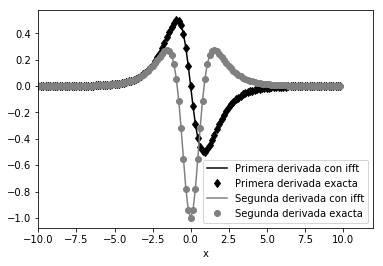

In [10]:

#plt.plot(x,ux,'b') #Si se quiere ver la funcion original
plt.plot(x,u1,'k',label = 'Primera derivada con ifft')
plt.plot(x,u1exacto,'kd',label = 'Primera derivada exacta')
plt.plot(x,u2,'grey',label='Segunda derivada con ifft')
plt.plot(x,u2exacto,color='grey',marker='o',label='Segunda derivada exacta', linestyle='')
plt.xlabel('x')
plt.xlim(-10,12)
plt.legend(loc='best')

plt.show()



#####  Figura 3. Gráfica que compara las derivadas obtenidas con transformadas de Fourier con las derivadas teóricas o exactas.

Según los resultados ilustrados en la [figura 3](#fig:3) los datos de la derivada no parecen tener mayor diferencia entre las derivadas exactas. Para evaluar de manera más precisa este método de derivación se emplean tambien derivadas finitas de segundo y cuarto orden y se comparan los resultados.

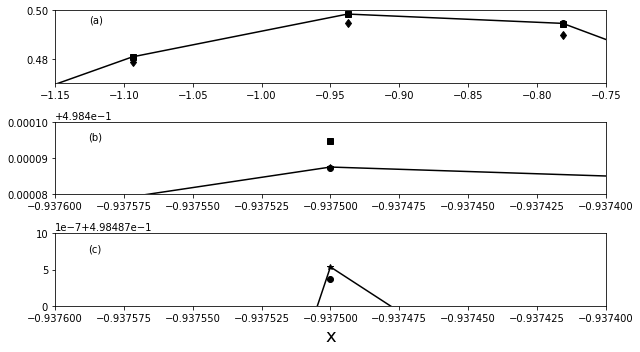

In [11]:
plt.figure(1,figsize=(9,5))

plt.subplot(311) # Comparación de la derivada finita de segundo orden
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-1.15, -0.75, 0.47, 0.5])
plt.annotate('(a)',xy=(-1.125,0.495))


plt.subplot(312) # Comparación de la derivada finita de cuarto orden
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-0.9376,-0.9374,0.49848,0.49850])
plt.annotate('(b)',xy=(-0.937588,0.498495))


plt.subplot(313) # Comparación de la derivada con transformadas de Fourier
plt.plot(x,u1exacto,'k*-')
plt.plot(x,u1,'ko')
plt.plot(x,ufini2,'ks')
plt.plot(x,ufini,'kd')
plt.axis([-0.9376,-0.9374,0.498487,0.498488])
plt.annotate('(c)',xy=(-0.937588,0.49848775))

plt.xlabel('x',fontsize='18')
plt.tight_layout()
plt.show()

#####  Figura 4. Gráfica que compara los valores de la derivada exacta con (a) La derivada finita de segundo orden, (b) La derivada finita de cuarto orden y (c) La derivada con la transformada de Fourier.

En la [figura 4](#fig:4) se hace evidente que para la aproximación de la derivada se tienen diferencias en el rango de $10^{-2}$, $10^{-5}$ y $10^{-6}$ para los métodos de segundo orden, cuarto orden y FFT respectivamente. Por lo tanto queda demostrado que el método de FFT es aconsejable para este tipo de aplicación.

## Aplicaciones de FFT: Detección y filtrado <a name="12.2"></a>

Otra aplicación para las transformadas de Fourier es para la detección y fitrado de diferentes señales. En el siguiente ejemplo se toma la misma función de el punto anterior pero se distorsiona con un ruido blanco que modifica la señal recibida y se muestra el procedimiento para filtrar estos datos.

In [12]:
L2 = 30 #Dominio de la función
n2 = 512 #Cuantas series de Fourier se crean (Fourier mode = 2^n)

#Valores asignados al dominio de la función en el tiempo:
t2 = linspace(-L2,L2,n2+1)
t = t2[0:n2]

#Dominio de la transformada:
vectfour2 = concatenate((arange(0,n2/2),arange(-n2/2,0)))
k2= (2*pi/(2*L2))*(vectfour2)

#Función evaluada
ux2 = 1/cosh(t)

In [13]:
#Amplitud de la señal de ruido aplicada
noiseb = 1 # Ruido de menor valor
noisec = 3.5 # Ruido de mayor valor

ut122 = fft.fft(ux2) # Transformada de la función evaluada
utn122b = ut122+noiseb*(randn(n2)+1j*randn(n2)) # Transformada de la función evaluada con el ruido de menor valor
utn122c = ut122+noisec*(randn(n2)+1j*randn(n2)) # Transformada de la función evaluada con el ruido de mayor valor
un122b = fft.ifft(utn122b) # Función en el dominio de tiempo después de agregar el ruido de menor valor
un122c = fft.ifft(utn122c) # Función en el dominio de tiempo después de agregar el ruido de mayor valor

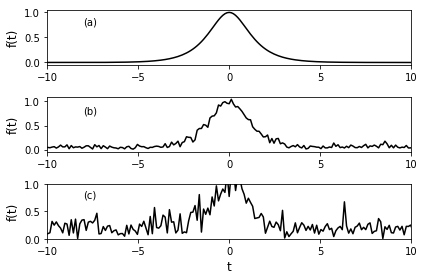

In [14]:
plt.figure(1)

plt.subplot(311) # Gráfica de la función original a evaluar
plt.plot(t,ux2,'k')
plt.yticks(arange(0,1.5,0.5))
plt.xticks(arange(-10,15,5))
plt.xlim(-10,10)
plt.ylabel('f(t)',fontsize='12')
plt.annotate('(a)',xy=(-8,0.75))

plt.subplot(312) # Gráfica de la función original después de agregar el ruido de menor valor
plt.plot(t,abs(un122b),'k')
plt.yticks(arange(0,1.5,0.5))
plt.xlim(-10,10)
plt.xticks(arange(-10,15,5))
plt.ylabel('f(t)',fontsize='12')
plt.annotate('(b)',xy=(-8,0.75))


plt.subplot(313) # Gráfica de la función original después de agregar el ruido de mayor valor
plt.plot(t,abs(un122c),'k')
plt.yticks(arange(0,1.5,0.5))
plt.xlim(-10,10)
plt.xticks(arange(-10,15,5))
plt.ylabel('f(t)',fontsize='12')
plt.ylim(0,1)
plt.annotate('(c)',xy=(-8,0.75))

plt.xlabel('t',fontsize='12')
plt.tight_layout()
plt.show()

##### Figura 5. Gráfica de $f(t)=Sech(t)$ con un ruido blanco de amplitud (a) 0, (b) 1 y (c) 3.5.

De la [figura 5](#fig:5) se puede observar cómo se van perdiendo los valores representativos de la función original a medida que se le agrega un ruido y el efecto es mucho peor cuando su amplitud aumenta. A continuación se plantea un caso extremo (pero que puede ocurrir) en el que la señal se pierde por completo debido al ruido que la afecta y se procede a filtrar dicha señal para intentar recuperar los valores originales de la función.

In [15]:
noise = 10 # Ruído de gran amplitud
ut122 = fft.fft(ux2) # Transformada de la función sin ruido
utn122 = ut122+noise*(randn(n2)+1j*randn(n2)) # Transformada de la función agregando el ruido de gran amplitud
un122 = fft.ifft(utn122) #Función con ruido en el dominio del tiempo

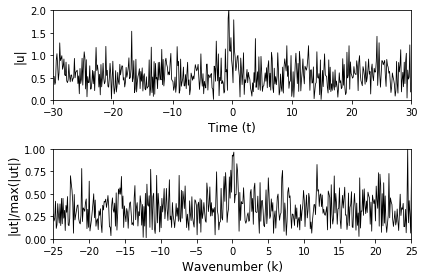

In [16]:
plt.figure(1)


plt.subplot(211) # Gráfica de la función con ruido en el dominio del tiempo
plt.plot(t,abs(un122),'k',lw=0.8)
plt.axis([-30, 30, 0 ,2 ])
plt.xlabel('Time (t)',fontsize='12')
plt.ylabel('|u|',fontsize='12')


plt.subplot(212) # Gráfica normalizada de la función con ruido transformada
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'k',lw=0.8)
plt.axis([-25,25,0,1])
plt.xticks(arange(-25,30,5))
plt.xlabel('Wavenumber (k)',fontsize='12')
plt.ylabel('|ut|/max(|ut|)',fontsize='12')

plt.tight_layout()
plt.show()

##### Figura 6. Gráficas de la función con ruido en el dominio del tiempo y en el dominio de las frecuencias generado por la transformada.

Con las gráficas de  la [figura 6](#fig:6) queda claro que es posible ocultar la señal tanto en el dominio del tiempo como en el dominio de las frecuencias. En este caso se conoce la frecuencia de la señal deseada y se puede diseñar un filtro que tome los elementos de la señal deseada y remueva aquellos que están en otros valores. EL filtro aplicado se conoce como filtro Gaussiano que tiene la siguiente forma. 

Filtro Gaussiano:<br />
$\mathcal{F}(k)=exp(-\mathcal{T}(k-k_0)^2)$


La señal deseada se centra a una número de onda alrededor de 0 por eso $k_0 = 0$ en el filtro mostrado a continuación.

In [17]:
f = exp(-0.2*(k2)**2) # Función del filtro
utfn122 = f*utn122 # Función transformada con ruido filtrada 
ufn122 = fft.ifft(utfn122) # Función con ruido en el dominio del tiempo filtrada

Los resultados varían en gran medida dependiendo los valores aleatorios asignados por "randn" al momento de agregar el ruido.

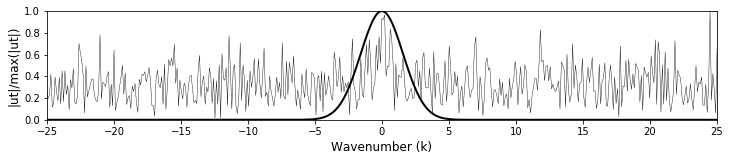

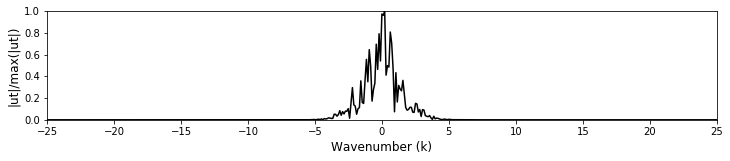

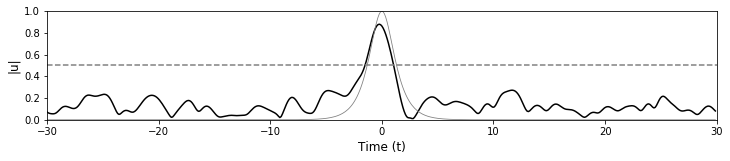

In [18]:
plt.figure(1,figsize=(12,2)) # Gráfica de función con ruido y el filtro aplicado
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'k',lw=0.4) 
plt.plot(fft.fftshift(k2),fft.fftshift(f),'k',lw=2)
plt.xlim(-25,25)
plt.xticks(arange(-25,30,5))
plt.ylim(0,1)
plt.xlabel('Wavenumber (k)',fontsize = 12)
plt.ylabel('|ut|/max(|ut|)',fontsize='12')

plt.figure(2,figsize=(12,2)) # Gráfica de función filtrada con ruido en el dominio de frecuencias
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utfn122))/max(abs(fft.fftshift(utfn122))),'k')
plt.xlim(-25,25)
plt.xticks(arange(-25,30,5))
plt.ylim(0,1)
plt.xlabel('Wavenumber (k)',fontsize = 12)
plt.ylabel('|ut|/max(|ut|)',fontsize='12')


plt.figure(3,figsize=(12,2)) # Gráfica de función filtrada en el dominio del tiempo comparado con la función ideal
plt.plot(t,abs(ufn122),'k')
plt.plot(t,ux2,'grey',lw=0.8)
plt.axhline(y=0.5,color='grey',linestyle='--')
plt.xlim(-30,30)
plt.ylim(0,1)
plt.xlabel('Time (t)',fontsize = 12)
plt.ylabel('|u|',fontsize='12')
plt.show()

##### Figura  7. Gráficas del procesamiento de los datos. Primero, se tiene la señal con ruido comparada con la función del filtro en el dominio de las frecuencias. Segundo, se encuentra la gráfica de la función con ruido despues de aplicar el filtro. Por último, la gráfica de la función filtrada en el dominio del tiempo comparada con la ideal.

Si cambiamos el valor de $k_0$ entonces ya no se va a encontrar la señal deseada, como se muestra a continuación en la [figura 8](#fig:8):

In [19]:
k0 = 15
f2 = exp(-0.2*(k2-k0)**2)
utf2n122 = f2*utn122
uf2n122=fft.ifft(utf2n122)

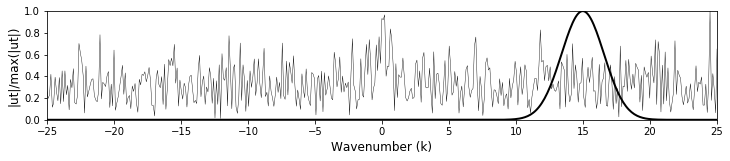

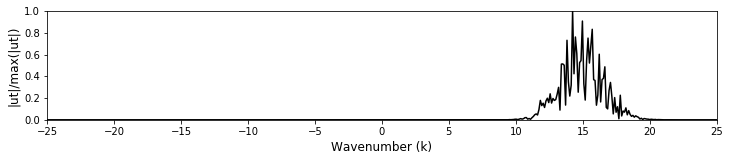

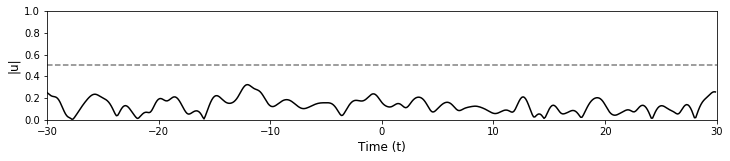

In [20]:
plt.figure(1,figsize=(12,2))
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utn122))/max(abs(fft.fftshift(utn122))),'k',lw=0.4)
plt.plot(fft.fftshift(k2),fft.fftshift(f2),'k',lw=2)
plt.xlim(-25,25)
plt.xticks(arange(-25,30,5))
plt.ylim(0,1)
plt.xlabel('Wavenumber (k)',fontsize = 12)
plt.ylabel('|ut|/max(|ut|)',fontsize='12')

plt.figure(2,figsize=(12,2))
plt.plot(fft.fftshift(k2),abs(fft.fftshift(utf2n122))/max(abs(fft.fftshift(utf2n122))),'k')
plt.xlim(-25,25)
plt.xticks(arange(-25,30,5))
plt.ylim(0,1)
plt.xlabel('Wavenumber (k)',fontsize = 12)
plt.ylabel('|ut|/max(|ut|)',fontsize='12')

plt.figure(3,figsize=(12,2))
plt.plot(t,abs(uf2n122),'k')
plt.axhline(y=0.5,color='grey',linestyle='--')
plt.xlim(-30,30)
plt.ylim(0,1)
plt.xlabel('Time (t)',fontsize = 12)
plt.ylabel('|u|',fontsize='12')

plt.show()

##### Figura 8. Gráficas del procesamiento de los datos **con un valor de $k_o$ diferente**. Primero, se tiene la señal con ruido comparada con la función del filtro en el dominio de las frecuencias. Segundo, se encuentra la gráfica de la función con ruido despues de aplicar el filtro. Por último, la gráfica de la función filtrada en el dominio del tiempo comparada con la ideal.

### Aplicaciones de FFT: Detección y promedio <a name="12.3"></a>

Tomando los valores de L, n, t, k, y ruido de la sección anterior, se busca filtrar la función a partir de los valores promedio de una serie de datos.

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


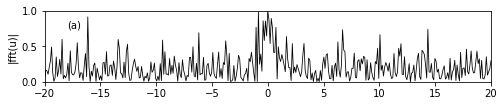

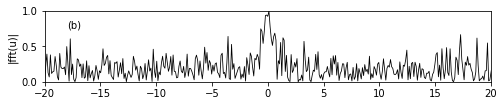

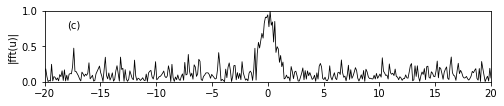

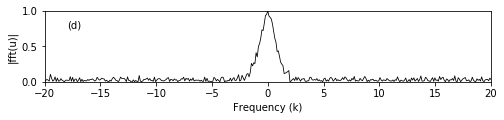

In [21]:
ks = fft.fftshift(k2)
muestras = [1,2,5,100]
datos = zeros((100,n2))
labels=['(a)','(b)','(c)','(d)']
for i in range(size(muestras)):
    utn123 = zeros((muestras[i],n2))
    ave = zeros(n2)
    plt.figure(1,figsize=(8,6))
    for j in range(muestras[i]):
        utn123[j] = ut122+noise*(randn(n2)+1j*randn(n2))
        ave = ave+utn123[j]
        datos[j] = abs(fft.fftshift(utn123[j]))/max(abs(utn123[j]))
    ave = abs(fft.fftshift(ave))/muestras[i]
    plt.subplot(4,1,i+1)
    plt.plot(ks,abs(ave/max(ave)),'k',lw=0.8)
    plt.axis([-20, 20, 0, 1])
    plt.ylabel('|fft(u)|')
    plt.annotate(labels[i],xy=(-18,0.75))
    if i+1 == 4:
        plt.xlabel('Frequency (k)')
    plt.show()

#####  Figura 9. Resultados de filtro por promedio para un conjunto de (a) 1 muestra, (b) 2 muestras, (c)  5 muestras, (d) 100 muestras.

En la [figura 9](#fig:9) se puede observar cómo a medida que aumenta el número de muestras tomadas para realizar el proceso de filtrado, se empieza a identificar la frecuencia de la señal y su amplitos de manera más clara. Una de las razones por las cuales este método parace funcionar es que dada la cantidad de datos y que los valores aleatorios siguen un comportamiento normal entonces se puede diferenciar la señal deseada a medida que aumenta la cantidad de datos. La [figura 10](#fig:10) es una gráfica que permite relacionar mejor el proceso de promediado en cada punto de la frecuencia dependiendo el número de muestras, para  evidenciar cómo se puede mejorar la calidad de la señal gracias a una mayor cantidad de datos.

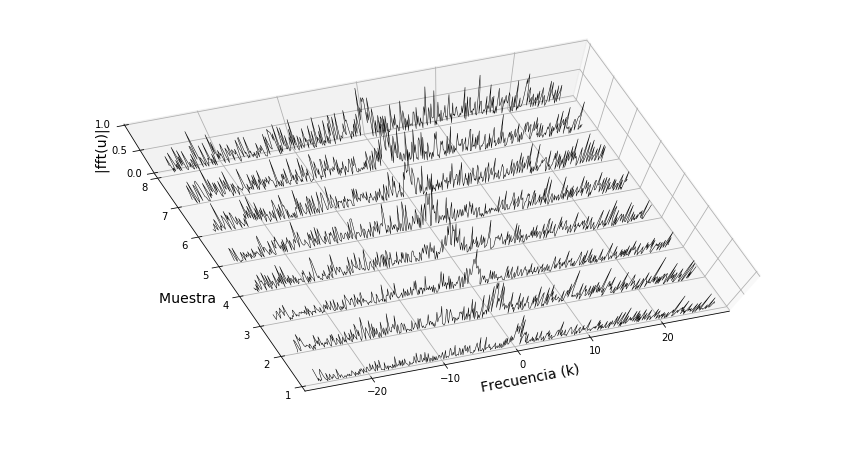

In [22]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111,projection='3d')

for i in range(0,8):
    ax.plot(ks,zeros(n2)+i+1,datos[i],'k',lw=0.5) #Gráfica de las primeras 8 muestras
ax.set_xlim(-28,28)
ax.set_ylim(1,8)
ax.set_zticks(arange(0,1.5,0.5))
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.xaxis._axinfo['label']['space_factor'] = 120
ax.set_xlabel('\nFrecuencia (k)',fontsize=14)
ax.set_ylabel('\nMuestra     ',fontsize=14,rotation=0)
ax.set_zlabel('\n|fft(u)|     ',fontsize=14,rotation=90)
ax.view_init(80,250)
ax.grid(color='grey',linestyle='.',linewidth=0.2)

plt.show()

##### Figura 10. Gráfica que relaciona el valor la transformada de la función en cada repetición con ruido y las frecuencias en el dominio de la misma.

Una de las consecuencias de sacar la amplitud de la señal por medio de promedios es que se puede perder el comportamiento de la función en el domino del tiempo. En otras palabras, al hacer la inversa de la tranformada promediada, se obtiene la magnitud de la señal pero no se sabe como varía en el dominio original. La [figura 11](#fig:11) muestra como se van desplazando las señales en el dominio del tiempo mientras que cuando se hace la transformada se pierde esta característica pues todo queda en una misma frecuencia.

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


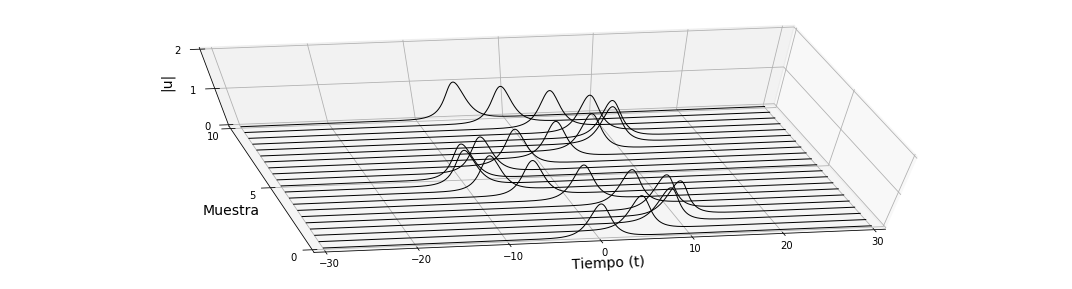

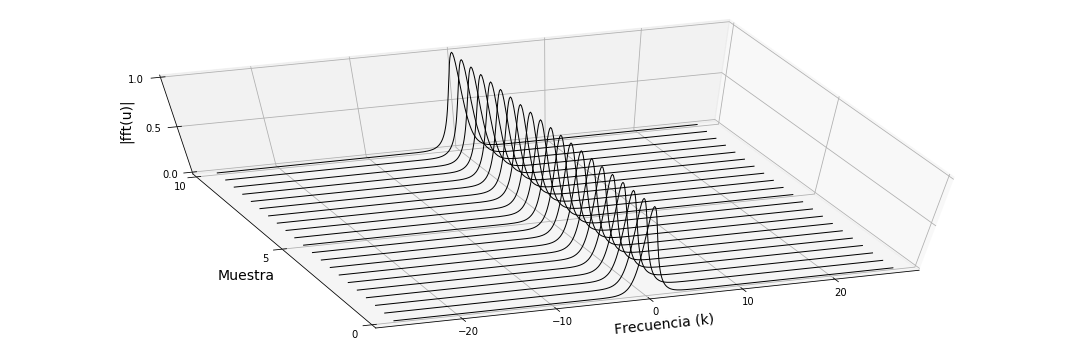

In [23]:
#En tiempo
slaice = arange(0,10.5,0.5)
T,S = meshgrid(t,slaice)
K,S = meshgrid(k2,slaice)
U = (1/cosh(T-10*sin(S)))*exp(1j*0*T)
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(211,projection='3d')
for i in range(size(slaice)):
    ax.plot(T[i,:],zeros(n2)+S[i,:],U[i,:],'k',lw=1)
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,2)
ax.set_zticks(arange(0,3,1))
ax.set_yticks(arange(0,15,5))
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('\nTiempo (t)',fontsize=14)
ax.set_ylabel('\n\nMuestra',fontsize=14,rotation=0)
ax.set_zlabel('|u|',fontsize=14,rotation=90)
ax.view_init(60,260)
plt.tight_layout()
plt.show()

#En frecuencia
Ut = [] #Por alguna razón esto no funciona cuando los arreglos se inicializan con zeros, entonces me guié de la referencia
Kp = []
Utp = []
Utn = []
Utnp = []
Un = []
for i in range(size(slaice)):
    Uta = fft.fft(U[i])
    Ut.append(Uta)
    Kpa = fft.fftshift(K[i])
    Kp.append(Kpa)
    Utpa = fft.fftshift(Ut[i])
    Utp.append(Utpa)
    Utna= Ut[i]+noise*(randn(n2)+1j*randn(n2))
    Utn.append(Utna)
    Utnpa = fft.fftshift(Utn[i]/max(abs(Utn[i])))
    Utnp.append(Utnpa)
    Una = fft.ifft(Utn[i])
    Un.append(Una)
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(212,projection='3d')
for i in range(size(slaice)):
    ax.plot(Kp[i],zeros(n2)+S[i],abs(Utp[i])/max(abs(Utp[i])),'k',lw=1)
ax.set_xlim(-28,28)
ax.set_ylim(0,10)
ax.set_zlim(0,1)
ax.set_zticks(arange(0,1.5,0.5))
ax.set_yticks(arange(0,15,5))
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('\nFrecuencia (k)',fontsize=14)
ax.set_ylabel('\n\nMuestra',fontsize=14,rotation=0)
ax.set_zlabel('|fft(u)|',fontsize=14,rotation=90)
ax.view_init(60,250)
plt.tight_layout()
plt.show()

#####  Figura 11. Gráfica que muestra el comportamiento de la función original, primero en el dominio del tiempo y después en el dominoo de frecuencias de la transformada.

Esto también ayuda para tener en cuenta que si se realizara el promedio de la función con dominio en el tiempo, debido a que la magnitud de la señal varía dentro de ese rango, lo único que se lograría es dispersar los valores, perdiendo todo dato relevante. Por eso, aunque al momento de agregar el ruido, tanto en dominio del tiempo como en el de la transformada ([figura  12](#fig:12)), ambas funciones terminan siendo muy parecidas, **el promedio se debe sacar en la funciones transformadas** pues los datos de interes están todos en una misma frecuencia.

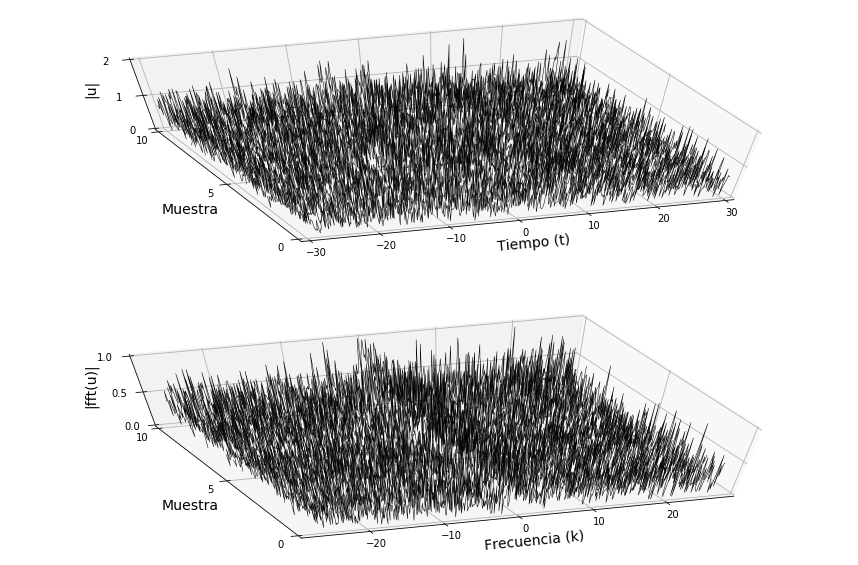

In [24]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(211,projection='3d')
#En el tiempo con ruido
for i in range(size(slaice)):
    ax.plot(T[i],zeros(n2)+S[i],abs(Un[i]),'k',lw=0.5)
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,2)
ax.set_zticks(arange(0,3,1))
ax.set_yticks(arange(0,15,5))
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('\nTiempo (t)',fontsize=14)
ax.set_ylabel('\n\nMuestra',fontsize=14,rotation=0)
ax.set_zlabel('|u|',fontsize=14,rotation=90)
ax.view_init(60,250)

#En frecuencia con ruido
ax = fig.add_subplot(212,projection='3d')
for i in range(size(slaice)):
    ax.plot(Kp[i],zeros(n2)+S[i],abs(Utnp[i]),'k',lw=0.5)
ax.set_xlim(-28,28)
ax.set_ylim(0,10)
ax.set_zlim(0,1)
ax.set_zticks(arange(0,1.5,0.5))
ax.set_yticks(arange(0,15,5))
ax.zaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.set_xlabel('\nFrecuencia (k)',fontsize=14)
ax.set_ylabel('\n\nMuestra',fontsize=14,rotation=0)
ax.set_zlabel('|fft(u)|',fontsize=14,rotation=90)
ax.view_init(60,250)
plt.show()

#####  Figura 12. Gráfica de las funciones con ruido en ambos dominoa, tanto en el tiempo (primera) como en frecuencia (segunda).

Si se tiene una señal con una menor cantidad de muestras, el resultado será muy parecido a los discutido anteriormente. La [figura 13](#fig:13) muestra que al sacar el promedio en el dominio del tiempo, no se puede diferencia la señal deseada, mientras que con la frecuencia se obtiene un pico en al rededor de la frecuencia donde se encuentran los datos de interes. Esto permitiría en primera instancia diseñar un filtro de frecuencias para mejorar aún más la calidad de la muestra.

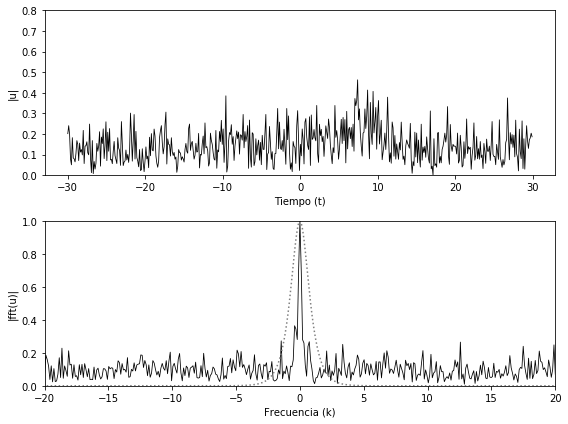

In [25]:
Uave = zeros(n2)
Utave = zeros(n2)
for i in range(size(slaice)):
    Uave = Uave+Un[i]
    Utave = Utave+Utn[i]
Uave = Uave/size(slaice)
Utave = fft.fftshift(Utave)/size(slaice)

plt.figure(1,figsize=(8,6))

plt.subplot(211) # Gráfica de promedio en el dominio del tiempo
plt.plot(t,abs(Uave),'k',lw=0.8)
plt.ylim(0,0.8)
plt.xlabel('Tiempo (t)')
plt.ylabel('|u|')

plt.subplot(212) # Gráfica de promedio en frecuencia
plt.plot(ks,abs(Utave)/max(abs(Utave)),'k',lw=0.8)
plt.plot(ks,abs(fft.fftshift(Ut[0]))/max(abs(Ut[0])),color='grey',ls=':')
plt.axis([-20,20,0,1])
plt.xlabel('Frecuencia (k)')
plt.ylabel('|fft(u)|')
plt.tight_layout()
plt.show()


##### Figura 13. Gráfica que muestra el resutado de promediar 21 muestras en el domino del tiempo (primera) y en el dominio de frecuencias comparado con la gráfica ideal (segunda).

## 2. Ejemplo  propio <a name="segundo"></a>

En este ejemplo se toma un audio del disparo de una escopeta y se quiere agregar ruido y por medio del análisis de frecuencia encontrar la manera de filtrarlo para estrablecer a cuál corresponde el dispari del arma. Esto podría servir para monitorear el uso de armas de fuego en zonas públicas y mejorar la respuesta de la autoridades en situaciones de emergencia.

In [26]:
from __future__ import print_function, division

import thinkdsp
import thinkplot

In [27]:
shotgun = thinkdsp.read_wave('37237__shades__gun-shot-gun-2-pumps.wav')

shotgun.make_audio()

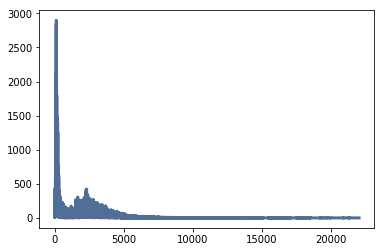

In [28]:
espectro = shotgun.make_spectrum()
espectro.plot()


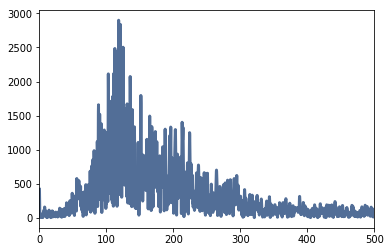

In [29]:
espectro.plot()
thinkplot.config(xlim=[0,500])

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


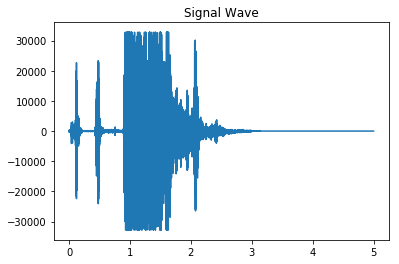

In [30]:
spf = wave.open('37237__shades__gun-shot-gun-2-pumps.wav','r')

signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

tiempo = linspace(0,5,size(signal))
spf.close()

plt.figure(1)
plt.title('Signal Wave')
plt.plot(tiempo,signal)
show()

In [31]:
import scipy.io.wavfile

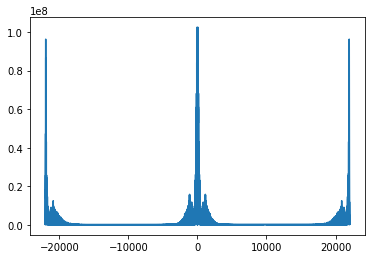

In [32]:
parametros = spf.getparams()
transform = fft.fft(signal)
shifted = fft.fftshift(transform)

kep = fft.fftfreq(size(signal),1/parametros.framerate)

plt.plot(kep,abs(transform))
plt.show()

In [33]:
scipy.io.wavfile.write('prueba.wav',88200,signal)
#Fue importante cuadrar el sample rate '88200' para que diera el mismo tiempo de reproducción
prueba = thinkdsp.read_wave('prueba.wav')

prueba.make_audio()

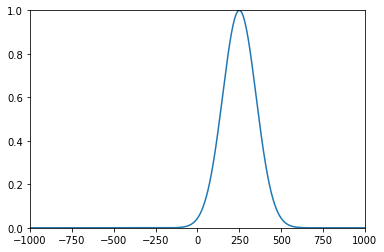

In [34]:
desp = 250
filtro = exp(-0.00005*(kep-desp)**2)
plt.plot(fft.fftshift(kep),fft.fftshift(filtro))
plt.axis([-1000,1000,0,1])
plt.show()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


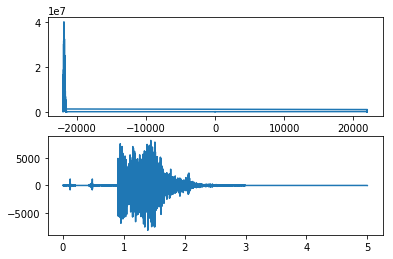

In [35]:
tf = filtro*transform
otf = fft.fftshift(tf)
filtrada = fft.ifft(tf)
plt.subplot(211)
plt.plot(kep,abs(otf))

plt.subplot(212)
plt.plot(tiempo,filtrada)
plt.show()

In [53]:
data =asarray(filtrada,dtype=int32)
scipy.io.wavfile.write('filtrada.wav',88200,data)
resultado = thinkdsp.read_wave('filtrada.wav')

resultado.make_audio()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


De esta manera se concluye que un filtro efectivo para determinar cuando hay un disparo es:

In [70]:
fdisparo = exp(-0.00005*(kep-desp)**2)

Donde kep es el el dominio de la transformada.

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


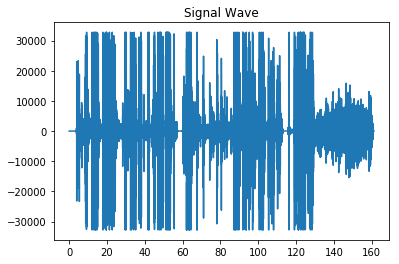

In [37]:
spf2 = wave.open('12 Gauge Shotgun Field Test.wav','r')

signal2 = spf2.readframes(-1)
signal2 = np.fromstring(signal2, 'Int16')

tiempo2 = linspace(0,2*60+41,size(signal2))

plt.figure(1)
plt.title('Signal Wave')
plt.plot(tiempo2,signal2)
show()

Intervalos de interes:
    12 Gauge
    8s-16s
    50s-55s
    Remington 11 semi-auto
    1m-1m5s
    1m40s-1m43s
    Mossberg 500A 12 gauge
    1m55s-2m5s

In [65]:
const = size(tiempo2)/161
#Intervalos de interes
#Calibre 12
s8 = round(const * 8)
s16 = round(const * 16)
s50 = round(const * 50)
s55 = round(const * 55)


#Remington 11
s60 = round(const * 60)
s65 = round(const * 65)
s100 = round(const * 100)
s143 = round(const * 143)

#Mossberg 500A 
s115 = round(const * 115)
s125 = round(const * 125)

In [66]:
#Tiempos
#Calibre 12
c12t1 = tiempo2[s8:s16]
c12t2 = tiempo2[s50:s55]

#Remington 11
r11t1 = tiempo2[s60:s65]
r11t2 = tiempo2[s100:s143]

#Mossberg 500A
m500t1 = tiempo2[s115:s125]

In [67]:
#Señal
#Calibre 12
c12s1 = signal2[s8:s16]
c12s2 = signal2[s50:s55]

#Remington 11
r11s1 = signal2[s60:s65]
r11s2 = signal2[s100:s143]

#Mossberg 500A
m500s1 = tiempo2[s115:s125] 


In [72]:
#Dominio fft
#Calibre 12
k1c12 = fft.fftfreq(size(c12s1),1/spf2.getparams().framerate)
k2c12 = fft.fftfreq(size(c12s2),1/spf2.getparams().framerate)

#Remington 11
k1r11 = fft.fftfreq(size(r11s1),1/spf2.getparams().framerate)
k2r11 = fft.fftfreq(size(r11s2),1/spf2.getparams().framerate)

#Mossberg 500A
k1m500 = fft.fftfreq(size(m500s1),1/spf2.getparams().framerate)

In [69]:
#Transformadas de la señal analizada
#Calibre 12
c12fft1 = fft.fft(c12s1)
c12fft2 = fft.fft(c12s2)

#Remington 11
r11fft1 = fft.fft(r11s1)
r11fft2 = fft.fft(r11s2)

#Mossberg 500A
m500fft1 = fft.fft(m500s1)

In [73]:
#Filtros dependiendo los tamaños de las señales
#Calibre 12
fd1c12 = exp(-0.00005*(k1c12-desp)**2)
fd2c12 = exp(-0.00005*(k2c12-desp)**2)

#Remington 11
fd1r11 = exp(-0.00005*(k1r11-desp)**2)
fd2r11 = exp(-0.00005*(k2r11-desp)**2)

#Mossberg 500A
fd1m500 = exp(-0.00005*(k1m500-desp)**2)

In [74]:
#Tranformadas filtradas 
#Calibre 12
c12fftf1 = fd1c12*c12fft1
c12fftf2 = fd2c12*c12fft2

#Remington 11
r11fftf1 = fd1r11*r11fft1
r11fftf2 = fd2r11*r11fft2

#Mossberg 500A
m500fftf1 = fd1m500*m500fft1

In [75]:
#Orden correcto de la señal filtrada
#Calibre 12
oc12fftf1 = fft.fftshift(c12fftf1)
oc12fftf2 = fft.fftshift(c12fftf1)

#Remington 11
or11fftf1 = fft.fftshift(r11fftf1)
or11fftf2 = fft.fftshift(r11fftf2)

#Mossberg 500A
om500fftf1 = fft.fftshift(r11fftf2)

In [76]:
#Señal filtrada en el dominio del tiempo
#Calibre 12
c12f1 = fft.ifft(oc12fftf1)
c12f2 = fft.ifft(oc12fftf2)

#Remington 11
r11f1 = fft.ifft(or11fftf1)
r11f2 = fft.ifft(or11fftf2)

#Mossberg 500A
m500f1 = fft.ifft(om500fftf1)

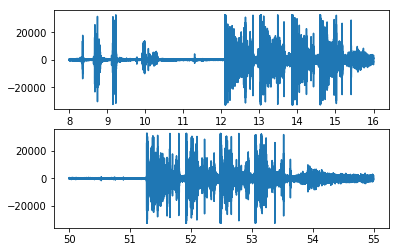

In [56]:
#Primera serie de disparos calibre 12
plt.subplot(211)
plt.plot(c12t1,c12s1)

#Segunda serie de disparos calibre 12
plt.subplot(212)
plt.plot(c12t2,c12s2)
plt.show()

Este es el registro de audio en el video para cada serie de disparos:

In [59]:
#Primera serie de disparos calibre 12
scipy.io.wavfile.write('c12audio1.wav',88200,c12s1)

c12audio1 = thinkdsp.read_wave('c12audio1.wav')

c12audio1.make_audio()

In [61]:
#Segunda serie de disparos calibre 12
scipy.io.wavfile.write('c12audio2.wav',88200,c12s2)

c12audio2 = thinkdsp.read_wave('c12audio2.wav')

c12audio2.make_audio()

In [40]:


oc12fftf = fft.fftshift(c12fftf)
c12f = fft.ifft(oc12fftf)



C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


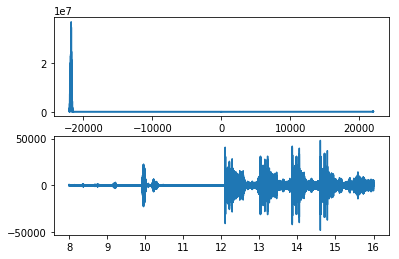

In [41]:
plt.subplot(211)
plt.plot(kc12,abs(oc12fftf))

plt.subplot(212)
plt.plot(c12t,c12f)
plt.show()


In [49]:
dc12 =asarray(c12f,dtype=int32)
scipy.io.wavfile.write('calibre12.wav',88200,dc12)
calibre12 = thinkdsp.read_wave('calibre12.wav')

calibre12.make_audio()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [ ]:
c12s = signal2[s8:s16]
c12t = tiempo2[s8:s16]
plt.plot(c12t,c12s)
plt.show()